In [1]:
from formulae import design_matrices

import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

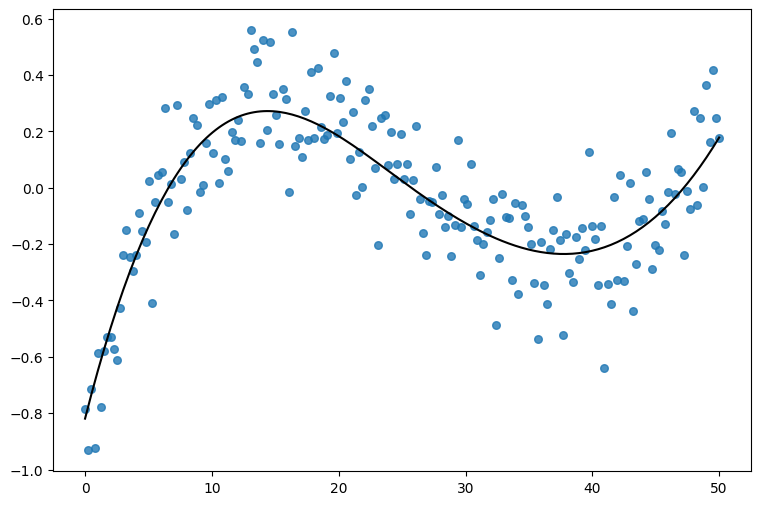

In [2]:
rng = np.random.default_rng(seed=121195)

N = 200
x = np.linspace(0, 50, N)
b = 0.1 * rng.normal(size=5)
sigma_t = 0.15

dm = design_matrices("0 + bs(x, df=5, intercept=True)", pd.DataFrame({"x": x}))
X = np.array(dm.common)
f = 10 * X @ b
y = f + sigma_t * rng.normal(size=N)

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(x, y, s=30, alpha=0.8);
ax.plot(x, f, color="black");

In [9]:
m = [10]
df = pd.DataFrame({"x": x, "y": y})
prior_hsgp = {
    "sigma": bmb.Prior("Exponential", lam=2),
    "ell": bmb.Prior("InverseGamma", mu=10, sigma=1),
    "input_dim": 1
}
priors = {"hsgp(x, m = m, c = 2, centered = True)": prior_hsgp}
model = bmb.Model("y ~ 0 + hsgp(x, m = m, c = 2, centered = True)", df, priors=priors)
#model.set_alias({"hsgp(x, m = m, c = 2, centered = True)": "hsgp"})
model

       Formula: y ~ 0 + hsgp(x, m = m, c = 2, centered = True)
        Family: gaussian
          Link: mu = identity
  Observations: 200
        Priors: 
    target = mu
        HSGP effects
            hsgp(x, m = m, c = 2, centered = True) ~ HSGP
        
        Auxiliary parameters
            y_sigma ~ HalfStudentT(nu: 4.0, sigma: 0.2834)

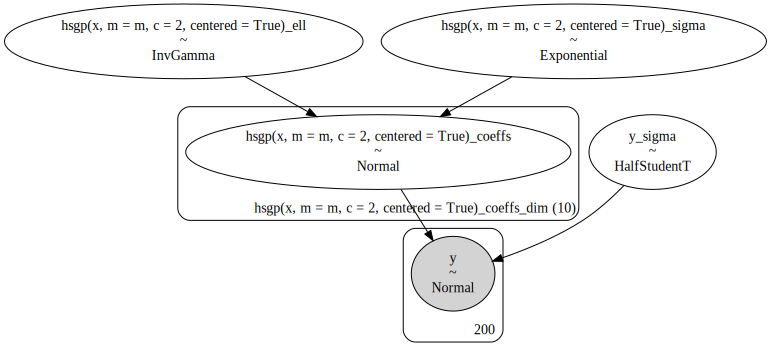

In [10]:
model.build()
model.graph()

In [11]:
idata = model.fit(inference_method="nuts_numpyro")

Compiling...


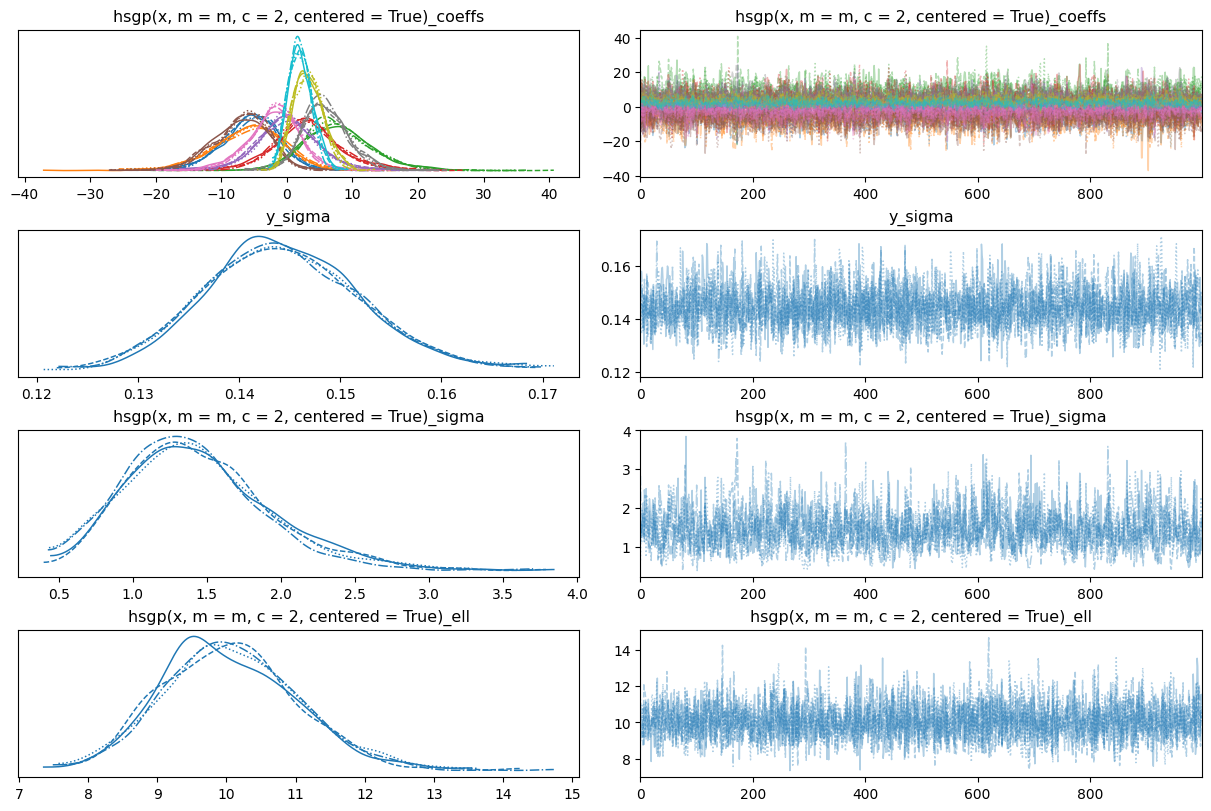

In [ ]:
az.plot_trace(idata, backend_kwargs={"layout": "constrained"});